In [144]:
import pandas as pd

df = pd.read_csv('owner-threshold.csv', sep=';')
df.columns = ['addr', 'threshold', 'owners']

In [145]:
df.dropna(inplace=True)

In [146]:
def convert_threshold(threshold):
    if threshold.startswith('0x'):
        if threshold[2:]:
            return int(threshold[2:], 16)
        else:
            return 0
    else:
        return 0

In [147]:
df['threshold'] = df['threshold'].apply(convert_threshold)


In [154]:
df['owners'] = df.owners.str.slice(1, -1).str.split(',')

In [155]:
df['num_owners'] = df['owners'].apply(len)

Text(0.5, 1.0, 'Number of owners per multisig wallet')

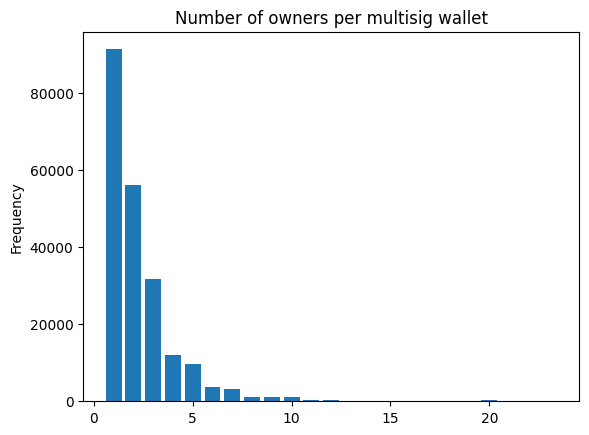

In [156]:
plot = df.plot.hist(y='num_owners', bins=range(1, 25), rwidth=0.8, align='left', legend=False)
plot.set_title('Number of owners per multisig wallet')

In [157]:
quantile_95 = df['num_owners'].quantile(0.95)

In [158]:
df['num_owners'].describe()

count    213112.000000
mean          2.436695
std           4.000158
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         332.000000
Name: num_owners, dtype: float64

In [152]:
len(df[df['num_owners'] > 10])

1882

In [181]:
df_owners = df[["addr", "owners"]].explode('owners')

In [187]:
df_owners.groupby("owners").count().sort_values(by='addr', ascending=False).head(20)

,addr
owners,
0x2BB655A15c96776B5A8Fa75EFD22B2c030098FfF,418
0x8385225367d8fDa054f179983826197c621639e5,389
0x0D48ea9c9B3fD098F1E811fb1028e9437DD246B3,324
0x5Fc96c182Bb7E0413c08e8e03e9d7EFc6cf0B099,261
0xa9d8188B35f05ab9a07454eA412A2dA6F1eBD036,260
0xa643c0FCf6e0D5C4a5F0dD78B3aaf7B900a4a4E3,248
0xCD2bC1877aDc1E55289F8F1F17DeEaC798159c33,248
0x13e23E7D27764c1194db4d07714c73fa4E5bA591,248
0xb407bc1aB7Bc04A0dd90594Ec02ce7d8436dfc0B,248
